In [72]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [73]:
X = load_boston().data
Y = load_boston().target

In [74]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

Coef: [-0.6422388   0.57451719 -0.34676674  0.77720229 -1.07618193  3.11815054
 -0.09238386 -1.95362935  0.71924754 -0.26845392 -1.90974563  0.85967728
 -3.52119796]
MSE_SDG:  22.89023925877556


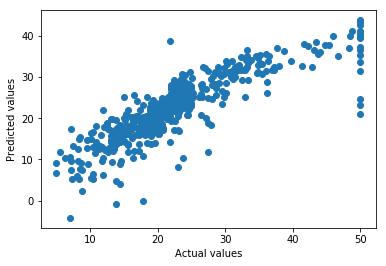

In [75]:
clf = SGDRegressor()
clf.fit(X, Y)
print("Coef:", clf.coef_)
MSE_SDG = mean_squared_error(Y, clf.predict(X))
print("MSE_SDG: ", MSE_SDG)
plt.scatter(Y, clf.predict(X))
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [76]:
def stochastic_gradient_descent(x,y,w,b,learning_rate,iteration):
    for i in range(iteration):
        for row,target in zip(x,y):
            row=row.reshape(1,13)
            y_pred=row.dot(w)+b
            loss=y_pred-target
            w=w-2*learning_rate*(row.T.dot(loss))
            b=b-2*learning_rate*sum(loss)
    return w,b

In [77]:
# Taken array of 13 because we have 13 columns for which we have to find the weights
w = np.zeros(13, dtype=int)
b=1
learning_rate = 0.001
iteration = 100
w, b = stochastic_gradient_descent(X, Y, w, b, learning_rate, iteration)

Coef:  [-1.14130069  0.92768563  0.13581293  0.81183038 -2.1005689   2.19046369
  0.11355834 -2.92935414  2.3492452  -1.77154744 -1.92764756  0.83742037
 -4.10046968]
Value of b:  22.177241888431823
MSE:  22.342617937984198


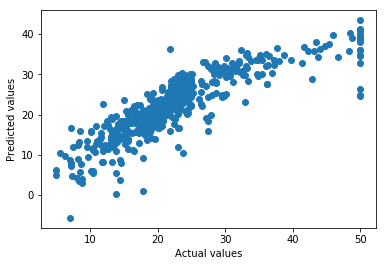

In [78]:
print("Coef: ", w)
print("Value of b: ", b)
MSE_NEW=mean_squared_error(Y, X.dot(w)+b)
print("MSE: ", MSE_NEW)
plt.scatter(Y, X.dot(w)+b)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

In [80]:
MSETable = pd.DataFrame({"Implementation" : ["SGDRegressor","SGD"],
                        "MSE" : [MSE_SDG, MSE_NEW]},
                     columns=["Implementation", "MSE"])
print(MSETable)

  Implementation        MSE
0   SGDRegressor  22.890239
1        Own SGD  22.342618
